
# Content Performance & Audience Engagement Analysis – Netflix Dataset
### Author: Akshita Kaul
### BSc Data Science and Analytics

## Business Problem
OTT platforms invest heavily in content creation. Evaluating content performance using audience ratings, engagement metrics, and production trends is essential for strategic decision-making.

This analysis explores Netflix movie data to identify genre dominance, rating patterns, engagement gaps, and overall content performance using structured exploratory data analysis.


## Import Libraries

Import necessary libraries for data manipulation and visualization.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load the dataset and examine its structure.

In [20]:
df = pd.read_csv('mymoviedb.csv' , lineterminator = '\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Data Cleaning & Preprocessing

Perform column standardization, datatype conversion, missing value handling, duplicate removal, genre normalization, and rating categorization to prepare the dataset for analysis.

In [21]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [22]:

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.columns

Index(['release_date', 'title', 'overview', 'popularity', 'vote_count',
       'vote_average', 'original_language', 'genre', 'poster_url'],
      dtype='object')

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


df['release_year'] = df['release_date'].dt.year


df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

In [24]:
df.isnull().sum()

release_date         0
title                0
overview             0
popularity           0
vote_count           0
vote_average         0
original_language    0
genre                0
poster_url           0
release_year         0
dtype: int64

In [25]:

df['popularity'] = df['popularity'].fillna(df['popularity'].median())
df['vote_count'] = df['vote_count'].fillna(0)
df['vote_average'] = df['vote_average'].fillna(df['vote_average'].median())


df['genre'] = df['genre'].fillna("Unknown")
df['original_language'] = df['original_language'].fillna("Unknown")


df = df.dropna(subset=['release_year'])

In [26]:
df = df.drop_duplicates()

df = df.drop_duplicates(subset=['title'])

In [27]:
df['genre'] = df['genre'].astype(str).apply(lambda x: x.split(', '))
df = df.explode('genre').reset_index(drop=True)

In [28]:
df.head()

,release_date,title,overview,popularity,vote_count,vote_average,original_language,genre,poster_url,release_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022


In [29]:
df['rating_category'] = pd.cut(
    df['vote_average'],
    bins=[0, 5, 7.5, 10],
    labels=['Low', 'Moderate', 'High']
)

In [30]:
df.head()

,release_date,title,overview,popularity,vote_count,vote_average,original_language,genre,poster_url,release_year,rating_category
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,High
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,High
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,High
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,High
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,High


## Genre Distribution Analysis

Identify which genres dominate the platform using frequency counts and visualize the results.

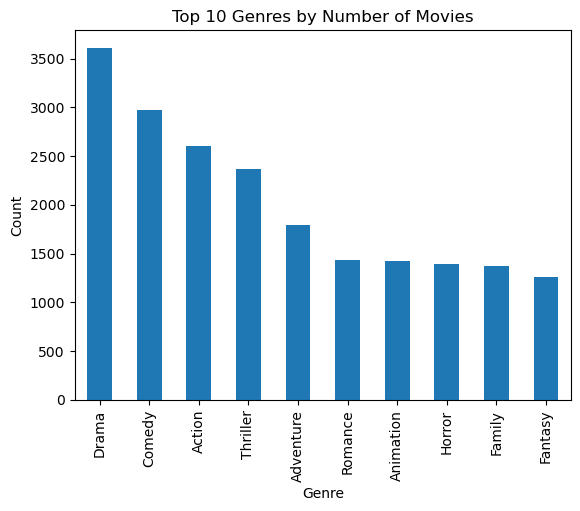

In [31]:
top_genres = df['genre'].value_counts().head(10)
plt.figure()
top_genres.plot(kind='bar')
plt.title("Top 10 Genres by Number of Movies")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

The analysis shows that Drama and related genres dominate the dataset in terms of volume.
This indicates that the platform maintains a strong focus on narrative-driven content,
likely aligned with consistent audience demand. However, high representation does not
necessarily imply superior performance. While dominant genres ensure content availability
and variety, performance differentiation within these categories may become increasingly
competitivetive.

## Rating Category Analysis

Analyze how movies are distributed across Low, Moderate, and High rating categories.

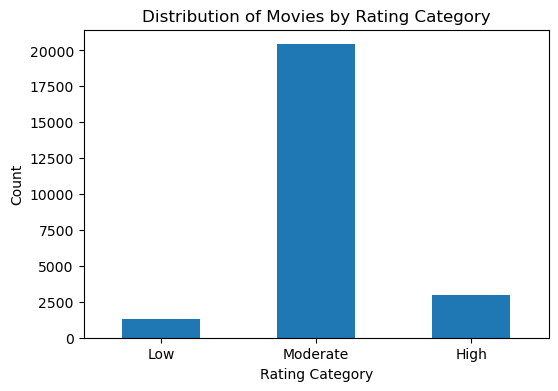

In [32]:
import matplotlib.pyplot as plt

rating_counts = df['rating_category'].value_counts().sort_index()

plt.figure(figsize=(6,4))
rating_counts.plot(kind='bar')

plt.title("Distribution of Movies by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Count")

plt.xticks(rotation=0)
plt.show()

The majority of movies fall within the Moderate rating category, suggesting that most
content achieves average audience approval rather than exceptional acclaim. Only a smaller
proportion of titles reach the High rating category, indicating that critically strong
content forms a limited segment of the overall catalog. This distribution highlights
a dispersion in quality levels across the platform.

## Genre-wise Average Rating

Evaluate average ratings across genres to determine performance differences.

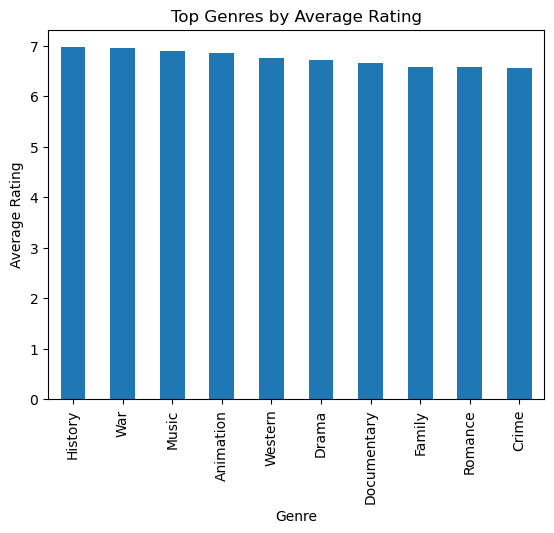

In [33]:
genre_avg = df.groupby('genre')['vote_average'].mean().sort_values(ascending=False).head(10)
plt.figure()
genre_avg.plot(kind='bar')
plt.title("Top Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

Analysis of average ratings across genres reveals that some less dominant genres achieve
higher audience satisfaction scores compared to high-volume categories. This suggests
that content quantity and perceived quality are not always aligned. Genres with stronger
average ratings may represent niche segments with loyal and engaged audiences,
potentially offering targeted growth opportunities.

## High-Rated but Low-Popularity Movies

Identify potentially undervalued content by filtering movies with high ratings but lower popularity.

In [34]:
high_low = df[(df['vote_average'] > 7.5) & 
              (df['popularity'] < df['popularity'].median())]
high_low[['title', 'genre', 'vote_average', 'popularity']].head(10)

,title,genre,vote_average,popularity
12494,Hey Arnold! The Jungle Movie,Family,7.6,22.024
12495,Hey Arnold! The Jungle Movie,Comedy,7.6,22.024
12496,Hey Arnold! The Jungle Movie,Animation,7.6,22.024
12497,Hey Arnold! The Jungle Movie,Adventure,7.6,22.024
12506,Fallen Angels,Action,7.7,22.013
12507,Fallen Angels,Romance,7.7,22.013
12508,Fallen Angels,Crime,7.7,22.013
12512,The Bridge on the River Kwai,Drama,7.8,22.009
12513,The Bridge on the River Kwai,History,7.8,22.009
12514,The Bridge on the River Kwai,War,7.8,22.009


The presence of movies that exhibit high ratings yet relatively low popularity
suggests a gap between audience approval and overall reach. These titles demonstrate
strong reception among viewers who engaged with them but limited broader visibility.
Such patterns may indicate marketing constraints, niche positioning, or distribution limitations.
Identifying these cases highlights potential areas for strategic exposure improvement.

## Production Trend Over Time

Analyze yearly movie production trends using a line chart.

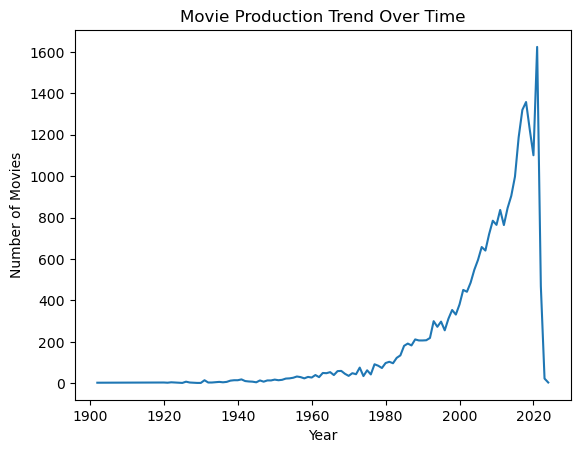

In [35]:
yearly_counts = df['release_year'].value_counts().sort_index()
plt.figure()
plt.plot(yearly_counts.index, yearly_counts.values)
plt.title("Movie Production Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

The production trend analysis shows periods of expansion in movie releases over time.
Peaks in certain years may reflect strategic growth phases or increased investment in content.
A sustained upward trend indicates scaling efforts, while fluctuations may signal
market adjustments or competitive responses within the streaming landscape.

## Composite Performance Score

Create a combined performance metric using vote_average and vote_count to identify balanced high-performing movies.

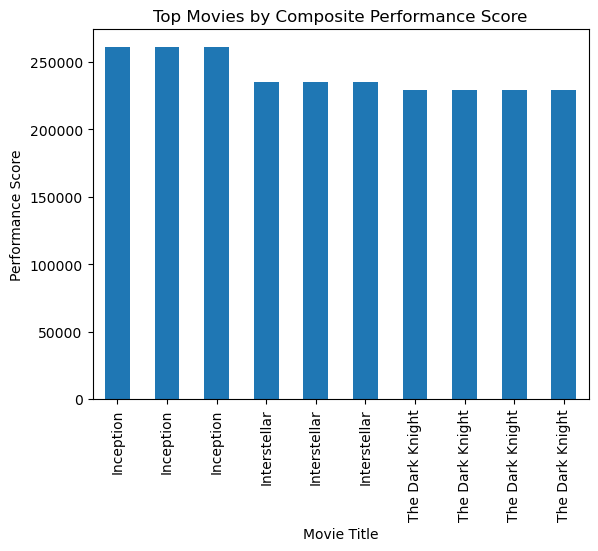

In [36]:
df['performance_score'] = df['vote_average'] * df['vote_count']
top_perf = df.sort_values(by='performance_score', ascending=False).head(10)
plt.figure()
top_perf.set_index('title')['performance_score'].plot(kind='bar')
plt.title("Top Movies by Composite Performance Score")
plt.xlabel("Movie Title")
plt.ylabel("Performance Score")
plt.show()

The composite performance score, calculated as the product of vote_average and vote_count,
provides a balanced evaluation of movie performance. Unlike relying solely on ratings
or popularity, this metric incorporates both audience approval and participation volume.
High composite scores indicate titles that are not only well-received but also widely engaged with,
thereby representing strong overall performers

## Conclusion

This analysis provides structured insights into genre dominance, rating behavior, engagement patterns, and production trends. The use of grouped aggregation, filtering, and visualizations strengthens interpretability and supports data-driven conclusions.